# Análise das Perdas Militares Russas na Guerra da Ucrânia
## Autor: Welliton Slaviero
## Disciplina: CCC269 - Data Science
## Prof. Dr. Carlos Amaral Hölbig
## Dataset: https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [3]:
from google.colab import drive
drive.mount('/content/drive')
caminho = '/content/drive/MyDrive/Estudos/10 semestre/Data Science/TrabalhoFinal/Datasets/'

Mounted at /content/drive


In [4]:
df_equipamentos = pd.read_csv(caminho + 'russia_losses_equipment.csv')
df_pessoal = pd.read_csv(caminho + 'russia_losses_personnel.csv')

df_equipamentos['date'] = pd.to_datetime(df_equipamentos['date'])
df_pessoal['date'] = pd.to_datetime(df_pessoal['date'])

print(f"Dados de equipamentos: {df_equipamentos.shape[0]} registros")
print(f"Dados de pessoal: {df_pessoal.shape[0]} registros")
print(f"Período analisado: {df_equipamentos['date'].min()} a {df_equipamentos['date'].max()}")

Dados de equipamentos: 1207 registros
Dados de pessoal: 1207 registros
Período analisado: 2022-02-25 00:00:00 a 2025-06-15 00:00:00


In [5]:
# TRANSFORMAÇÃO E LIMPEZA DOS DADOS

colunas_pt = {
    'date': 'data',
    'day': 'dia',
    'aircraft': 'aeronaves',
    'helicopter': 'helicopteros',
    'tank': 'tanques',
    'APC': 'veiculos_blindados',
    'field artillery': 'artilharia',
    'drone': 'drones',
    'personnel': 'pessoal'
}

df_equipamentos = df_equipamentos.rename(columns=colunas_pt)
df_pessoal = df_pessoal.rename(columns=colunas_pt)

colunas_principais = ['data', 'dia', 'aeronaves', 'helicopteros', 'tanques',
                     'veiculos_blindados', 'artilharia', 'drones']
df_eq_limpo = df_equipamentos[colunas_principais].copy()

df_completo = pd.merge(df_eq_limpo, df_pessoal[['data', 'pessoal']], on='data', how='inner')

df_completo = df_completo.sort_values('data').reset_index(drop=True)
for col in ['aeronaves', 'helicopteros', 'tanques', 'veiculos_blindados', 'artilharia', 'drones', 'pessoal']:
    df_completo[f'{col}_diarias'] = df_completo[col].diff().fillna(0)
    df_completo[f'{col}_diarias'] = df_completo[f'{col}_diarias'].apply(lambda x: max(0, x))

df_completo['ano'] = df_completo['data'].dt.year
df_completo['mes'] = df_completo['data'].dt.month
df_completo['mes_ano'] = df_completo['data'].dt.to_period('M')

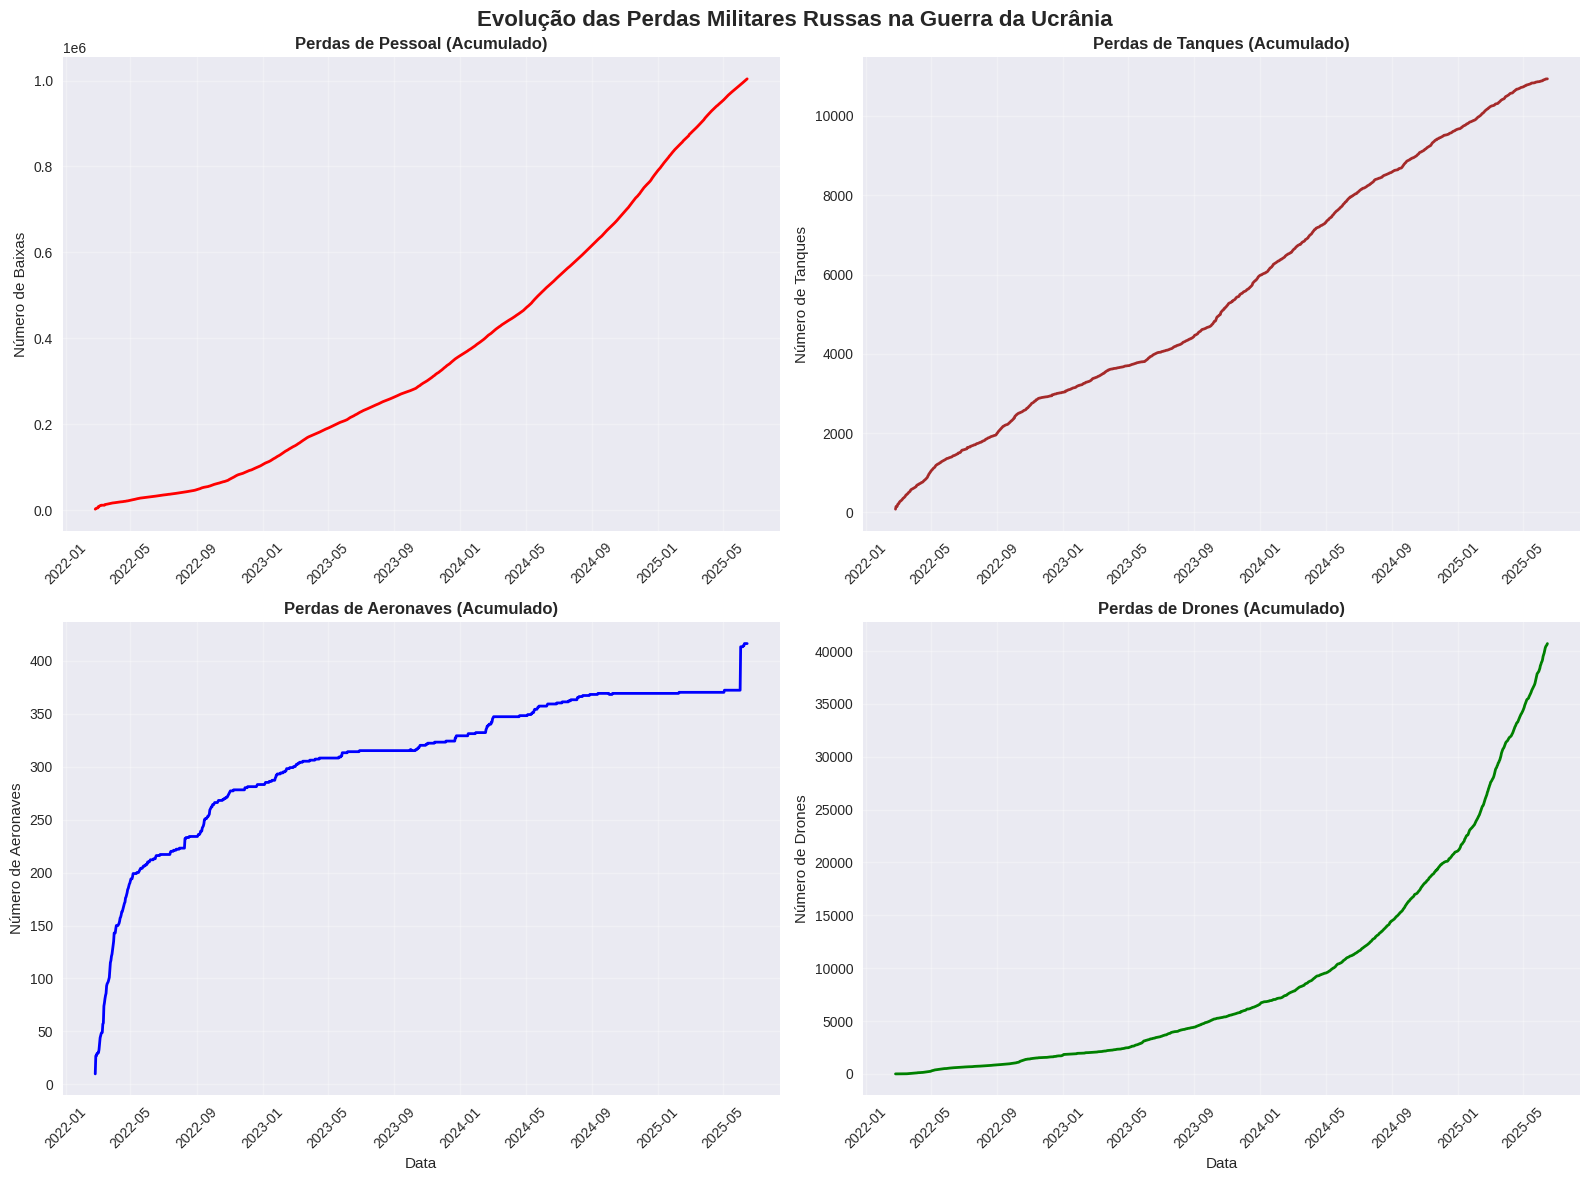

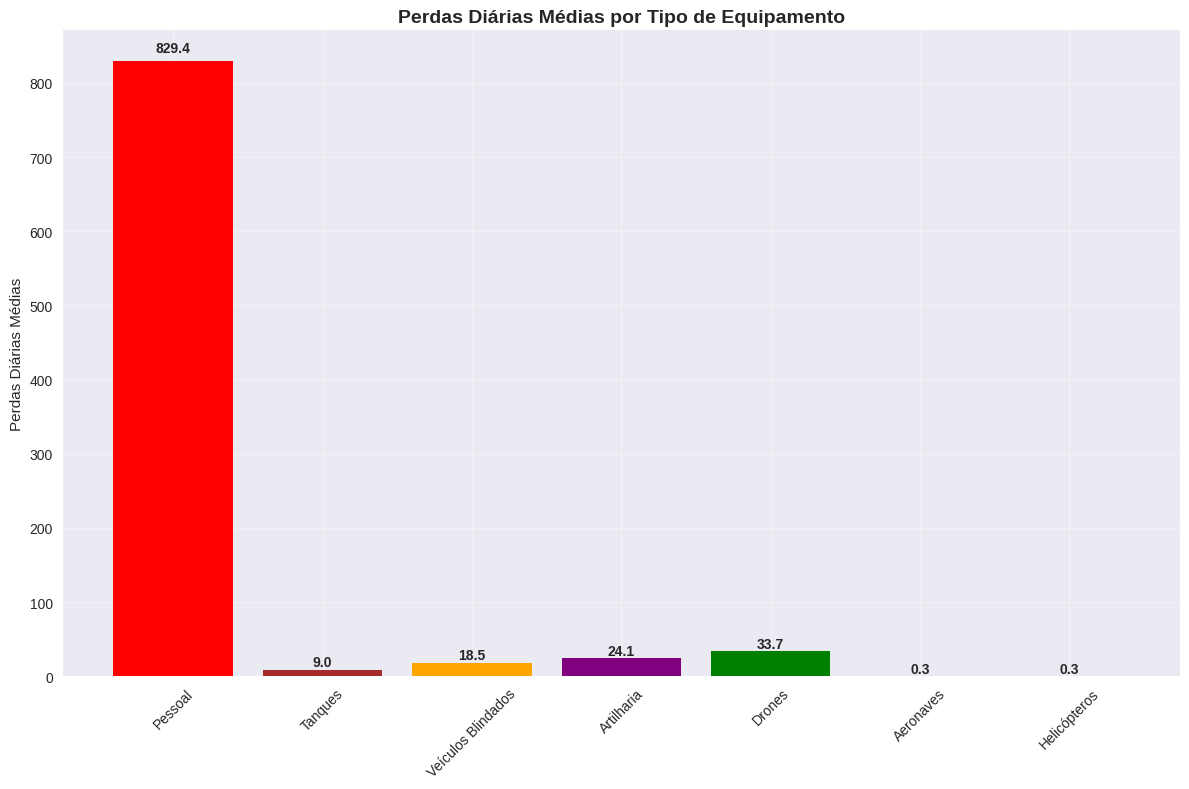

In [6]:
# VISUALIZAÇÃO DE DADOS (matplotlib, seaborn)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Evolução das Perdas Militares Russas na Guerra da Ucrânia', fontsize=16, fontweight='bold')

axes[0,0].plot(df_completo['data'], df_completo['pessoal'], color='red', linewidth=2)
axes[0,0].set_title('Perdas de Pessoal (Acumulado)', fontweight='bold')
axes[0,0].set_ylabel('Número de Baixas')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].tick_params(axis='x', rotation=45)

axes[0,1].plot(df_completo['data'], df_completo['tanques'], color='brown', linewidth=2)
axes[0,1].set_title('Perdas de Tanques (Acumulado)', fontweight='bold')
axes[0,1].set_ylabel('Número de Tanques')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].tick_params(axis='x', rotation=45)

axes[1,0].plot(df_completo['data'], df_completo['aeronaves'], color='blue', linewidth=2)
axes[1,0].set_title('Perdas de Aeronaves (Acumulado)', fontweight='bold')
axes[1,0].set_ylabel('Número de Aeronaves')
axes[1,0].set_xlabel('Data')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].tick_params(axis='x', rotation=45)

axes[1,1].plot(df_completo['data'], df_completo['drones'], color='green', linewidth=2)
axes[1,1].set_title('Perdas de Drones (Acumulado)', fontweight='bold')
axes[1,1].set_ylabel('Número de Drones')
axes[1,1].set_xlabel('Data')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

perdas_medias = {
    'Pessoal': df_completo['pessoal_diarias'].mean(),
    'Tanques': df_completo['tanques_diarias'].mean(),
    'Veículos Blindados': df_completo['veiculos_blindados_diarias'].mean(),
    'Artilharia': df_completo['artilharia_diarias'].mean(),
    'Drones': df_completo['drones_diarias'].mean(),
    'Aeronaves': df_completo['aeronaves_diarias'].mean(),
    'Helicópteros': df_completo['helicopteros_diarias'].mean()
}

equipamentos = list(perdas_medias.keys())
valores = list(perdas_medias.values())

bars = ax.bar(equipamentos, valores, color=['red', 'brown', 'orange', 'purple', 'green', 'blue', 'cyan'])
ax.set_title('Perdas Diárias Médias por Tipo de Equipamento', fontsize=14, fontweight='bold')
ax.set_ylabel('Perdas Diárias Médias')
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)

for bar, valor in zip(bars, valores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
            f'{valor:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

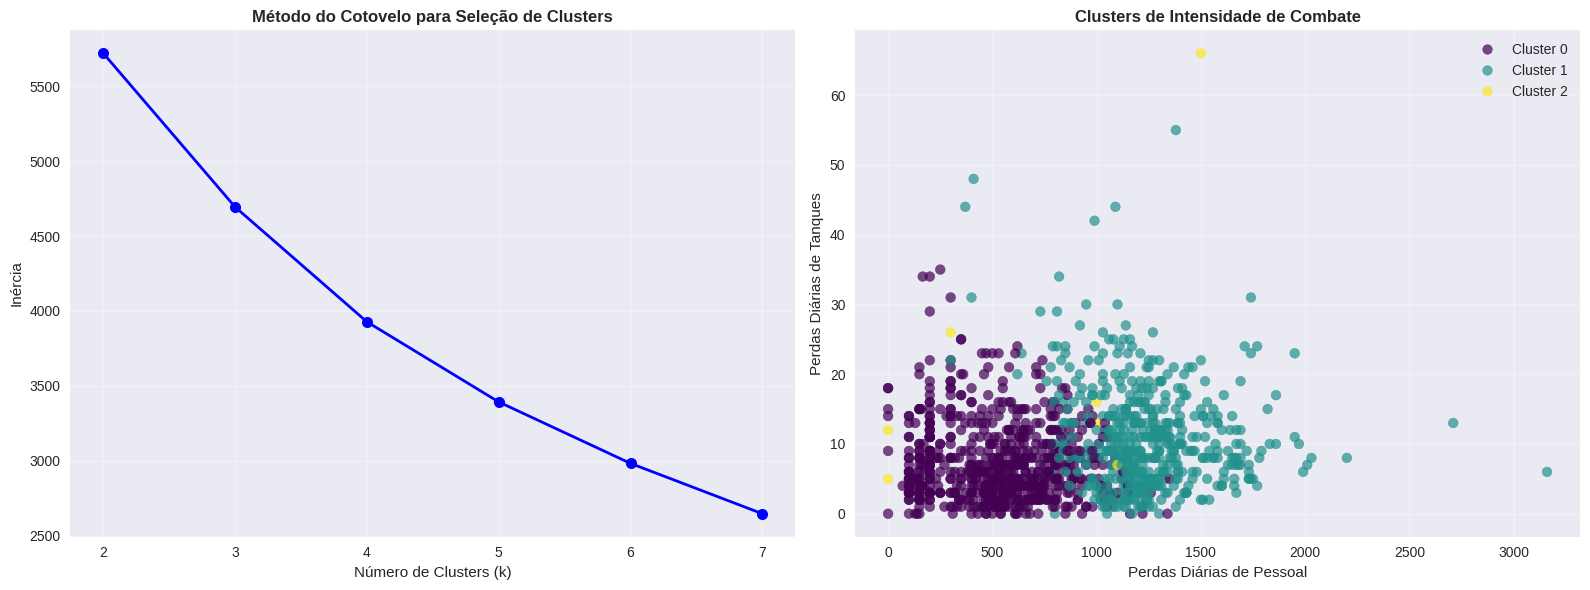


Cluster 0 (699 dias):
  Perdas médias diárias:
    Pessoal: 533.5
    Tanques: 7.5
    Aeronaves: 0.4
    Drones: 10.2

Cluster 1 (501 dias):
  Perdas médias diárias:
    Pessoal: 1244.0
    Tanques: 11.0
    Aeronaves: 0.1
    Drones: 66.7

Cluster 2 (7 dias):
  Perdas médias diárias:
    Pessoal: 700.0
    Tanques: 20.7
    Aeronaves: 12.3
    Drones: 19.1


In [7]:
# MACHINE LEARNING - CLUSTERING (K-Means)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

features_clustering = ['pessoal_diarias', 'tanques_diarias', 'aeronaves_diarias',
                      'helicopteros_diarias', 'veiculos_blindados_diarias', 'drones_diarias']

X_cluster = df_completo[features_clustering].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df_completo['cluster'] = clusters

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Número de Clusters (k)')
axes[0].set_ylabel('Inércia')
axes[0].set_title('Método do Cotovelo para Seleção de Clusters', fontweight='bold')
axes[0].grid(True, alpha=0.3)

scatter = axes[1].scatter(df_completo['pessoal_diarias'], df_completo['tanques_diarias'],
                         c=clusters, cmap='viridis', alpha=0.7, s=50)
axes[1].set_xlabel('Perdas Diárias de Pessoal')
axes[1].set_ylabel('Perdas Diárias de Tanques')
axes[1].set_title('Clusters de Intensidade de Combate', fontweight='bold')
axes[1].grid(True, alpha=0.3)

legend_labels = [f'Cluster {i}' for i in range(n_clusters)]
axes[1].legend(handles=scatter.legend_elements()[0], labels=legend_labels)

plt.tight_layout()
plt.show()

for i in range(n_clusters):
    cluster_data = df_completo[df_completo['cluster'] == i]
    print(f"\nCluster {i} ({len(cluster_data)} dias):")
    print(f"  Perdas médias diárias:")
    print(f"    Pessoal: {cluster_data['pessoal_diarias'].mean():.1f}")
    print(f"    Tanques: {cluster_data['tanques_diarias'].mean():.1f}")
    print(f"    Aeronaves: {cluster_data['aeronaves_diarias'].mean():.1f}")
    print(f"    Drones: {cluster_data['drones_diarias'].mean():.1f}")

In [8]:
# RESUMO ESTATÍSTICO

print(f"Período analisado: {df_completo['data'].min().strftime('%d/%m/%Y')} a {df_completo['data'].max().strftime('%d/%m/%Y')}")
print(f"Total de dias de conflito: {len(df_completo)}")

print(f"\nPerdas totais acumuladas:")
print(f"  Pessoal: {df_completo['pessoal'].iloc[-1]:,}")
print(f"  Tanques: {df_completo['tanques'].iloc[-1]:,}")
print(f"  Aeronaves: {df_completo['aeronaves'].iloc[-1]:,}")
print(f"  Helicópteros: {df_completo['helicopteros'].iloc[-1]:,}")
print(f"  Veículos Blindados: {df_completo['veiculos_blindados'].iloc[-1]:,}")
print(f"  Drones: {df_completo['drones'].iloc[-1]:,}")

print(f"\nPerdas diárias médias:")
print(f"  Pessoal: {df_completo['pessoal_diarias'].mean():.1f}")
print(f"  Tanques: {df_completo['tanques_diarias'].mean():.1f}")
print(f"  Aeronaves: {df_completo['aeronaves_diarias'].mean():.1f}")
print(f"  Drones: {df_completo['drones_diarias'].mean():.1f}")

Período analisado: 25/02/2022 a 15/06/2025
Total de dias de conflito: 1207

Perdas totais acumuladas:
  Pessoal: 1,003,860
  Tanques: 10,937
  Aeronaves: 416
  Helicópteros: 337
  Veículos Blindados: 22,804
  Drones: 40,709

Perdas diárias médias:
  Pessoal: 829.4
  Tanques: 9.0
  Aeronaves: 0.3
  Drones: 33.7
